# DATA FEATURES:
This dataset can be used to predict the presence of kidney stones based on urine analysis.

The 79 urine specimens, were analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.
The six physical characteristics of the urine are: 

(1) specific gravity, the density of the urine relative to water; 


(2) pH, the negative logarithm of the hydrogen ion; 


(3) osmolarity (mOsm), a unit used in biology and medicine but not in physical chemistry. Osmolarity is proportional to the concentration of molecules in solution; 


(4) conductivity (mMho milliMho). One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution; 


(5) urea concentration in millimoles per litre; and 


(6) calcium concentration (CALC) in millimolesllitre.

The data is obtained from 'Physical Characteristics of Urines With and Without Crystals',a chapter from Springer Series in Statistics.



# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d # used in 3D plotting

import matplotlib.pyplot as plt # data visualization
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns #

# EXPLORATORY DATA ANALYSIS

In [3]:

df = pd.read_csv('kidney.csv')

In [4]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [5]:
df.tail()

,gravity,ph,osmo,cond,urea,calc,target
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1
78,1.015,6.03,416,12.8,178,9.39,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gravity,79.0,1.018114,0.007239,1.005,1.012,1.018,1.0235,1.04
ph,79.0,6.028481,0.724307,4.760,5.530,5.940,6.3850,7.94
osmo,79.0,612.848101,237.514755,187.000,413.000,594.000,792.0000,1236.00
cond,79.0,20.813924,7.938994,5.100,14.150,21.400,26.5500,38.00
urea,79.0,266.405063,131.254550,10.000,160.000,260.000,372.0000,620.00
calc,79.0,4.138987,3.260051,0.170,1.460,3.160,5.9300,14.34
target,79.0,0.430380,0.498293,0.000,0.000,0.000,1.0000,1.00


# CORRELATION MATRIX

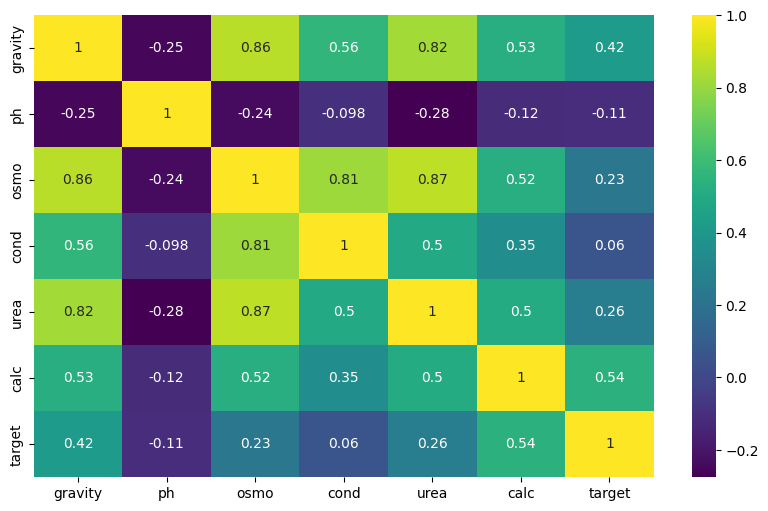

In [8]:
corr = df.corr()
max(corr)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='viridis', annot=True) 
plt.show()

# DATA VISUALIZATIONS

array([[<AxesSubplot: title={'center': 'gravity'}>,
        <AxesSubplot: title={'center': 'ph'}>,
        <AxesSubplot: title={'center': 'osmo'}>],
       [<AxesSubplot: title={'center': 'cond'}>,
        <AxesSubplot: title={'center': 'urea'}>,
        <AxesSubplot: title={'center': 'calc'}>],
       [<AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

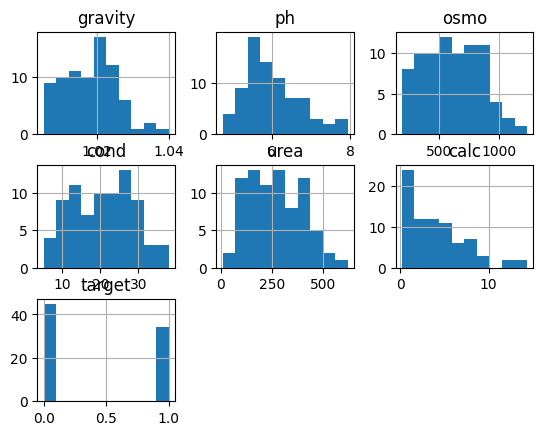

In [9]:
df.hist()

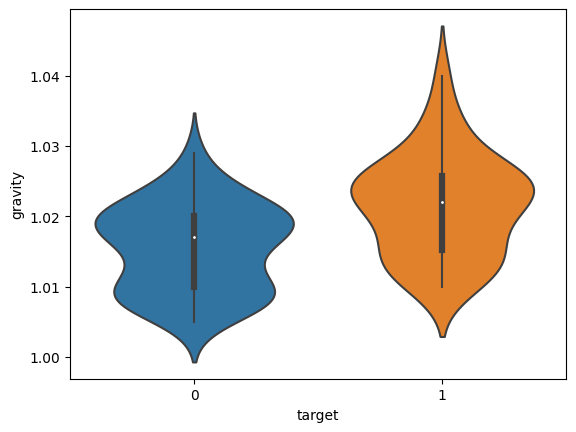

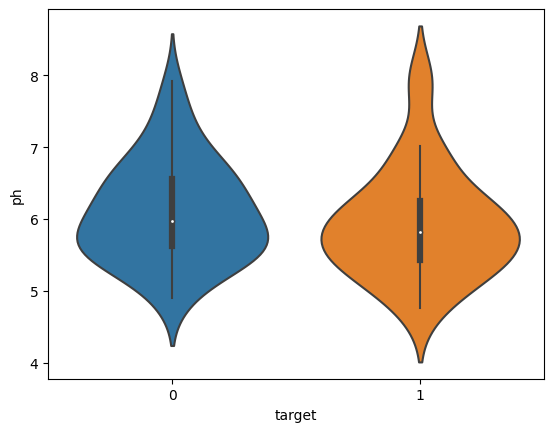

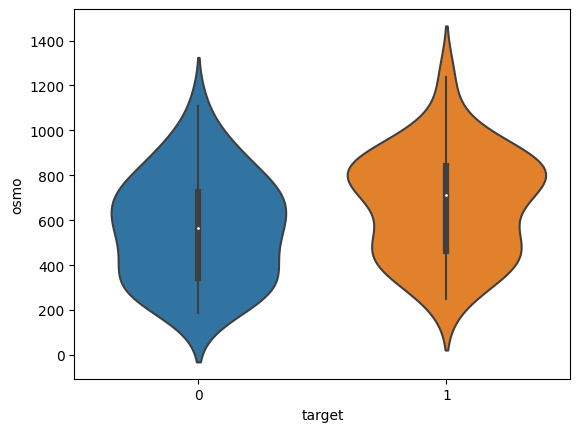

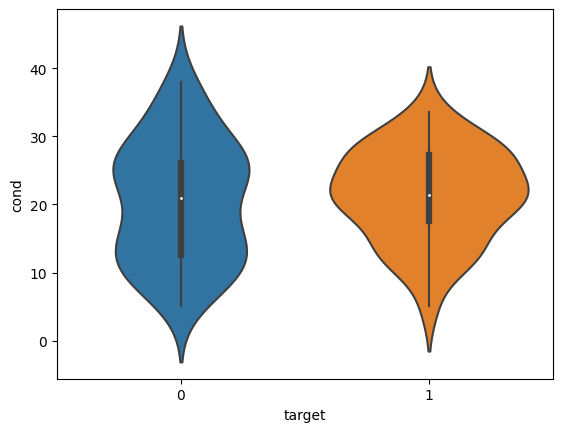

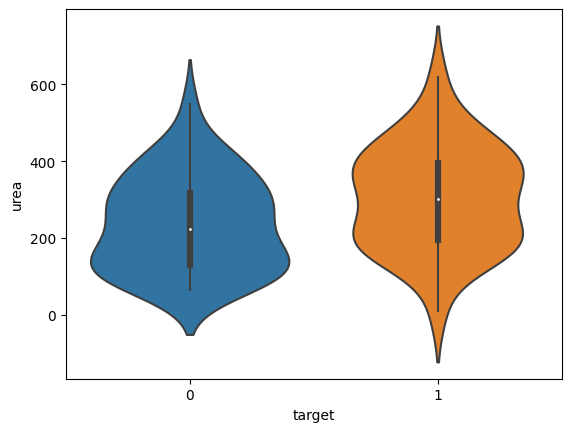

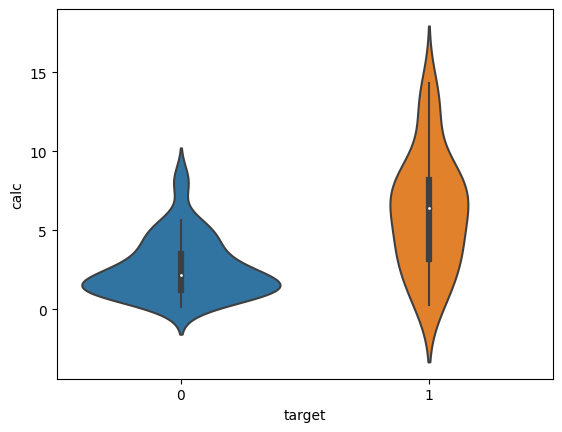

In [10]:
for col in df.columns[:-1]:
    sns.violinplot(x="target", y=col, data=df)
    plt.show()

# TRAIN TEST SPLITTING

In [11]:
X= df.drop(['target'], axis=1)
y = df['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=140)

# CHECKING THE ACCURACY

In [13]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import accuracy_score
params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Initialize the LGBMClassifier
lgbm = LGBMClassifier()

# Use RandomizedSearchCV to find the best hyperparameters
rs = RandomizedSearchCV(lgbm, params, n_iter=50, cv=5, random_state=42)
rs.fit(X_train, y_train)

# Print the best hyperparameters
print(rs.best_params_)

# Predict the target labels for the test set
y_pred = rs.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Accuracy: 0.9375


In [14]:
# Initialize the LGBMClassifier with the best hyperparameters
lgbm = LGBMClassifier(learning_rate=rs.best_params_['learning_rate'],
                      n_estimators=rs.best_params_['n_estimators'],
                      max_depth=rs.best_params_['max_depth'],
                      min_child_weight=rs.best_params_['min_child_weight'],
                      reg_alpha=rs.best_params_['reg_alpha'],
                      reg_lambda=rs.best_params_['reg_lambda'],
                      subsample=rs.best_params_['subsample'],
                      colsample_bytree=rs.best_params_['colsample_bytree'])

# Train the model on the training data
lgbm.fit(X_train, y_train)

# Predict the target labels for the test set
y_pred = lgbm.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9375


# CLASSIFICATION REPORT

In [15]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



In [16]:
def get_classification_report(y_test, y_pred):
    
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

s= get_classification_report(y_test, y_pred)
s

,precision,recall,f1-score,support
0,1.000000,0.909091,0.952381,11.0000
weighted avg,0.947917,0.937500,0.938853,16.0000
accuracy,0.937500,0.937500,0.937500,0.9375
macro avg,0.916667,0.954545,0.930736,16.0000
1,0.833333,1.000000,0.909091,5.0000


# CONFUSION MATRIX

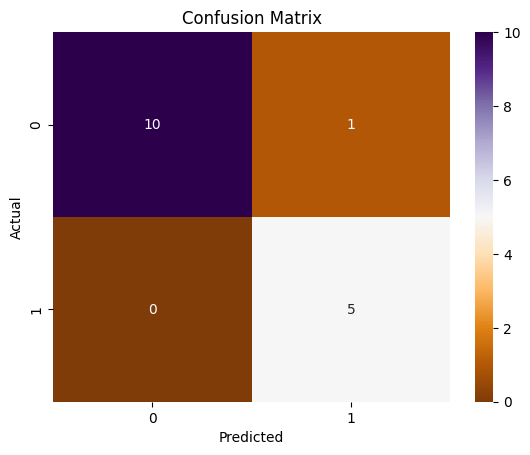

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Compute the classification report
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm, annot=True, cmap='PuOr', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# PICKLING THE MODEL

In [18]:
import pickle
with open('kidneystone.pkl', 'wb') as files:
    pickle.dump(lgbm,files)